# Stochastic Modelling Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from scipy.stats import norm
import scipy.stats as stats
import pandas as pd
%matplotlib inline

print("packages imported")

packages imported


### Last Class
- Monte Carlo Uncertainty Analysis

### Goals for Today
- Construct mathematical models for Stochastic problems
- Perform Monte Carlo and Monte Carlo Uncertainty analysis

### Pre-Lecture Activities
- Review the [pandas library](https://pandas.pydata.org/docs/user_guide/index.html). and how to import a dataset, pull out specific rows and columns, merge, min/max/mean/median/variance and other statistics, etc.

- Read the documentation on the [gaussian_kde](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) package in python, including the functions [.resample](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.resample.html#scipy.stats.gaussian_kde.resample) and [.integrate_box_1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.integrate_box_1d.html#scipy.stats.gaussian_kde.integrate_box_1d).

- If you would like a dataset to practice on, there are freely available datasets on [kaggle](https://www.kaggle.com/datasets).

## Pumpkin Patch

Suppose you own a pumpkin patch and know the following information about daily income and costs for the month of October:
- the quantity of pumpkins that each customer buys is equal to $\beta_1$, where $\beta_1 = 3 \pm 1$
- the price of each pumpkin is determined by weight and is equal to $\beta_2$, where $\beta_2 = 3 \pm 1.5$
- the number of customers on a given day is equal to $\beta_3t^2$, where $\beta_3 = 5 \pm 2$
- the costs associated with growing pumpkins is equal to $-\beta_4 t $, where $\beta_4 = 2.35 \pm 0.65$
- the total maintenance costs associated with maintaining the equipment needed to grow the pumpkins is equal to $- \beta_5t^{0.5}$, where $\beta_5 = 1.55 \pm 0.65$ (i.e., as the usage increases over the month of October, we have more maintenance costs to maintain the equipment)

Note $t$ here is time, which is measured in days, with $t=0$ corresponding to October $1$ and $t=30$ corresponding to October $31$. 

Construct a mathematical model for the net income of the pumpkin patch.

## Transit Trip Duration

A student is commuting from Richmond to UBC by public transit. They take the SkyTrain from Bridgeport station to City Hall station and then the 99 bus from City Hall station to campus. The train is scheduled to come every 3 minutes and the trip usually takes 13 minutes. The bus comes every 5 minutes and the trip usually takes 29 minutes. We don't know exactly the variance of each trip and so we want to construct a mathematical model of the total trip for different  variance values and see how that changes the variance of the total duration. In particular, we want to find bounds on the variances which guarantee that the total trip duration is less than an hour at least 90% of the time.

See the [TransLink Schedule](https://www.translink.ca/schedules-and-maps).

## Additional examples.

The following two example problems have some parts that have been filled in already and some directional statements to help guide the model construction and analysis.

## Stock Data

Stock price data for Apple Inc. is available at [nasdaq.com](https://www.nasdaq.com/market-activity/stocks/aapl/historical). The file `apple_stock.csv` includes price data from 2018 to 2023. Let $X$ be the daily gain given by the fraction (close - open)/open. Find the distribution of $X$ and use the distribution to create a new random variable which is the yearly gain:

$$
Y = \prod_{i=1}^{252} (1 + X_i) - 1
$$

where $X_i$ is the gain on day $i$ and each $X_i \sim N(\mu,\sigma^2)$ for the $\mu$ and $\sigma$ computed from the data. Find the distribution of $Y$ and compute the probability that Apple stock will gain more than 10% per year.

Note: there are usually 252 trading days in a year.

**Problem Statement:**

What is the probability distribution of the daily gains of apple from 2018 to 2023?

Construct the distribution of yearly gain over 252 days and determine the probability that apple stock will gain more than 10%

**Variables and Parameters:**

| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| daily gain | $X$ | 1 | normal random variable |
| yearly gain | $Y$ | 1 | random variable (function of $X_1,\dots,X_{252}$) |
|  mean of daily gain | $\mu$ | 1 | parameter |
|  variance of daily gain | $\sigma^2$ | 1 | parameter |
|  probability | $p$ | 1 | variable (model output) |


**Assumptions and Constraints:**

* Daily gain $X$ is normally distributed
* Daily gain $X_1,X_2,\dots,X_{252}$ are independent
* Only 252 trading days, ignoring leap years

**Build Solutions:**

*Import Data*

The code below imports the data as a pandas dataframe.

In [16]:
df = pd.read_csv('DATA/apple_stock.csv')

In [17]:
type(df)

pandas.core.frame.DataFrame

Use the methods `df.head()` and `df.tail()` to view the first/last 5 rows of `df`. What are the first and last trading days in the dataset? How many days are in the dataset?

In [18]:
df.head(), df.tail()

(   year  month  day    open   close    high     low
 0  2023     10   23  170.91  173.00  174.01  169.93
 1  2023     10   20  175.31  172.88  175.42  172.64
 2  2023     10   19  176.04  175.46  177.84  175.19
 3  2023     10   18  175.58  175.84  177.58  175.11
 4  2023     10   17  176.65  177.15  178.42  174.80,
       year  month  day   open  close   high    low
 1252  2018     10   30  52.79  53.33  53.80  52.32
 1253  2018     10   29  54.80  53.06  54.92  51.52
 1254  2018     10   26  53.98  54.08  55.05  53.17
 1255  2018     10   25  54.43  54.95  55.35  54.19
 1256  2018     10   24  55.65  53.77  56.06  53.64)

*Compute $X$:*

Access a column in the dataframe with the command `df[column_name]`. For example:

In [19]:
df['high'].head()

0    174.01
1    175.42
2    177.84
3    177.58
4    178.42
Name: high, dtype: float64

Create new columns with the same syntax. For example, let's compute the daily range:

In [20]:
df['range'] = df['high'] - df['low']

In [21]:
df.head()

,year,month,day,open,close,high,low,range
0,2023,10,23,170.91,173.00,174.01,169.93,4.08
1,2023,10,20,175.31,172.88,175.42,172.64,2.78
2,2023,10,19,176.04,175.46,177.84,175.19,2.65
3,2023,10,18,175.58,175.84,177.58,175.11,2.47
4,2023,10,17,176.65,177.15,178.42,174.80,3.62


Create a new column for the daily gain $X$ given by (close - open)/open. Plot the histogram of $X$, and compute $\mu_X$ and $\sigma_X^2$.

In [22]:
df['X'] = (df['close'] - df['open'])/df['open']

In [23]:
mu = df['X'].mean()
std_dv = df['X'].std()
mu, std_dv

(0.0010849260709015528, 0.01563501984638611)

(array([ 0.28567043,  0.        ,  0.        ,  0.        ,  0.        ,
         0.28567043,  0.        ,  0.        ,  0.        ,  1.1426817 ,
         0.85701128,  1.99969298,  1.71402255,  0.85701128,  3.14237468,
         3.99938596,  4.28505638,  4.85639723,  8.85578319,  8.57011276,
         9.99846489, 13.14083957, 17.71156638, 23.13930446, 27.99570169,
        28.28137212, 31.99508765, 27.99570169, 26.28167914, 23.13930446,
        23.99631574, 17.14022553, 12.56949872,  9.99846489,  6.57041979,
         5.42773808,  3.71371553,  2.2853634 ,  1.1426817 ,  0.57134085,
         0.85701128,  0.57134085,  1.1426817 ,  0.57134085,  0.28567043,
         0.28567043,  0.        ,  0.85701128,  0.28567043,  0.28567043]),
 array([-0.07265372, -0.06986889, -0.06708405, -0.06429922, -0.06151438,
        -0.05872955, -0.05594471, -0.05315988, -0.05037504, -0.04759021,
        -0.04480537, -0.04202054, -0.0392357 , -0.03645087, -0.03366603,
        -0.0308812 , -0.02809636, -0.02531153, -0

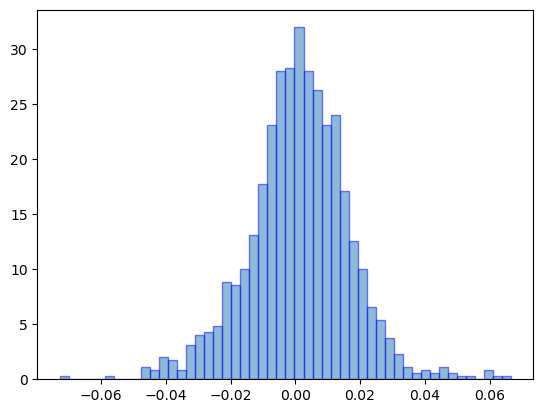

In [24]:
plt.hist(df['X'], bins=50, density=True, alpha=0.5, edgecolor='b')

*Distribution of $X$:*

We assume that $X$ is normally distributed. Use $\mu_X$ and $\sigma_X^2$ computed above to plot the probability density function of $X$. Plot the histogram of $X$ values in the same figure to verify they match.

(array([ 0.96500038,  0.        ,  0.        ,  0.        ,  0.        ,
         0.96500038,  0.48250019,  0.96500038,  0.48250019,  3.86000151,
         0.        ,  0.96500038,  2.41250094,  1.93000076,  8.20250321,
         3.86000151,  4.82500189,  8.6850034 ,  8.6850034 , 13.51000529,
        17.3700068 , 17.85250699, 20.74750812, 20.74750812, 16.88750661,
        23.16000907, 28.95001133, 27.02001058, 27.98501096, 23.64250926,
        21.7125085 , 24.60750963, 21.7125085 , 22.19500869, 24.12500945,
        16.40500642, 11.58000453, 14.95750586, 10.13250397,  7.23750283,
         3.86000151,  5.30750208,  2.89500113,  2.41250094,  1.44750057,
         0.96500038,  1.93000076,  1.93000076,  0.48250019,  1.44750057]),
 array([-0.05762998, -0.05555744, -0.0534849 , -0.05141237, -0.04933983,
        -0.04726729, -0.04519475, -0.04312221, -0.04104968, -0.03897714,
        -0.0369046 , -0.03483206, -0.03275952, -0.03068699, -0.02861445,
        -0.02654191, -0.02446937, -0.02239683, -0

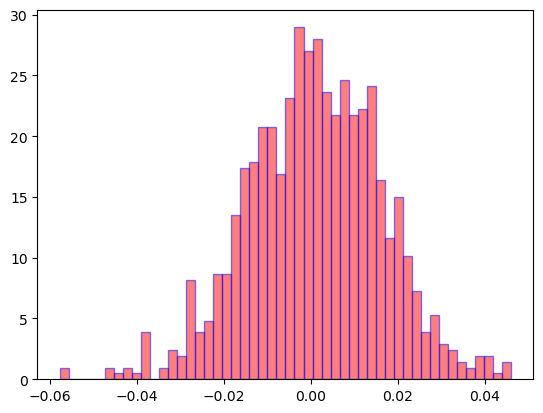

In [25]:
X = np.random.normal(mu, std_dv, 1000)
plt.hist(X, bins=50, density=True, alpha=0.5, color='r', edgecolor='b')

*Random Samples of $Y$*

We can generate random samples of $Y$ by generating $252$ random samples of $X$ and then computing

$$
Y = \prod_{i=1}^{252} (1 + X_i) - 1
$$

Use the function `np.prod` to compute the product. Generate $2000$ samples of $Y$, plot the histogram and compute the mean and variance.

In [43]:
y = lambda x: np.prod(1 + x) - 1

def Y(n):
    results = []
    for i in range(n):
        Xi = np.random.normal(mu, std_dv, 252)
        results.append(y(Xi))
    return results

(array([0.03406486, 0.04541981, 0.10219457, 0.11354953, 0.20438915,
        0.4314882 , 0.57910259, 0.57910259, 0.72671697, 1.02194574,
        0.95381602, 1.12414031, 1.21497993, 1.45343394, 1.31717451,
        1.26039974, 1.13549527, 1.20362498, 1.13549527, 1.24904479,
        0.94246107, 0.89704126, 0.77213678, 0.63587735, 0.56774763,
        0.4314882 , 0.36335848, 0.38606839, 0.32929363, 0.22709905,
        0.31793867, 0.1930342 , 0.22709905, 0.17032429, 0.05677476,
        0.01135495, 0.06812972, 0.03406486, 0.05677476, 0.02270991,
        0.01135495, 0.02270991, 0.04541981, 0.01135495, 0.        ,
        0.        , 0.01135495, 0.        , 0.        , 0.01135495]),
 array([-0.44433151, -0.40029786, -0.35626421, -0.31223056, -0.26819691,
        -0.22416326, -0.18012961, -0.13609597, -0.09206232, -0.04802867,
        -0.00399502,  0.04003863,  0.08407228,  0.12810593,  0.17213958,
         0.21617323,  0.26020688,  0.30424053,  0.34827417,  0.39230782,
         0.43634147,  0.48

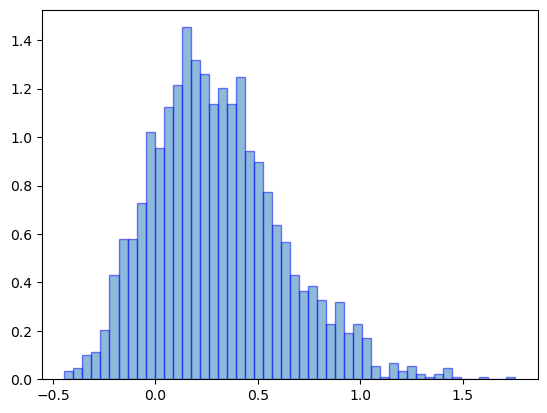

In [44]:
Y_mc = Y(2000)
plt.hist(Y_mc, bins=50, density=True, alpha=0.5, edgecolor='b')

*Kernel Density Function*

Compute the kernel density estimation of $Y$ and plot the result with the samples of $Y$ generated above.

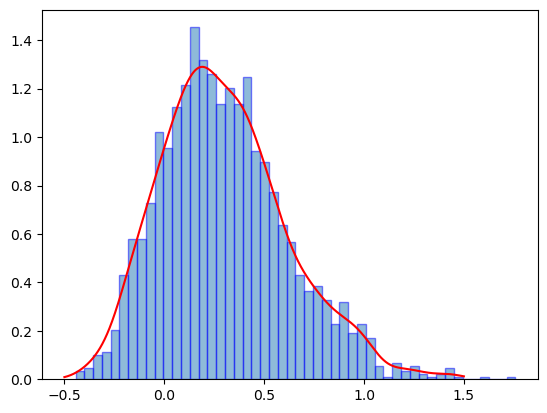

In [49]:
kde = stats.gaussian_kde(Y_mc)
plt.hist(Y_mc, bins=50, density=True, alpha=0.5, edgecolor='b')
plt.plot(np.linspace(-0.5, 1.5, 10000), kde(np.linspace(-0.5, 1.5, 10000)), color='r')
plt.show()

**Analyze and Assess**

The probability $P(Y \ge 0.1)$ is estimated by the integral of the kernel density function on the interval $(0.1,\infty)$. Use the function method `.integrate_box_1d()` to compute the integral.

In [52]:
prob = kde.integrate_box_1d(0.1, np.inf) 
prob

0.7157180726509293

(array([0.04895017, 0.09790034, 0.07342526, 0.09790034, 0.26922594,
        0.41607645, 0.44055153, 0.53845187, 0.75872764, 0.68530238,
        0.75872764, 1.12585391, 1.07690374, 1.05242866, 1.150329  ,
        1.49298019, 1.19927917, 1.22375426, 1.24822934, 1.19927917,
        1.3216546 , 1.22375426, 0.95452832, 0.80767781, 0.95452832,
        0.6608273 , 0.58740204, 0.53845187, 0.41607645, 0.26922594,
        0.22027577, 0.46502662, 0.14685051, 0.22027577, 0.07342526,
        0.09790034, 0.07342526, 0.09790034, 0.07342526, 0.02447509,
        0.09790034, 0.        , 0.09790034, 0.04895017, 0.02447509,
        0.        , 0.        , 0.        , 0.        , 0.02447509]),
 array([-0.44422255, -0.40336467, -0.36250679, -0.32164892, -0.28079104,
        -0.23993317, -0.19907529, -0.15821741, -0.11735954, -0.07650166,
        -0.03564378,  0.00521409,  0.04607197,  0.08692984,  0.12778772,
         0.1686456 ,  0.20950347,  0.25036135,  0.29121923,  0.3320771 ,
         0.37293498,  0.41

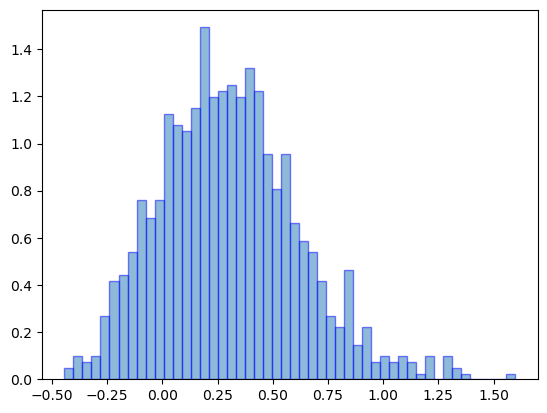

In [53]:
sample = kde.resample(1000).flatten()
plt.hist(sample, bins=50, density=True, alpha=0.5, edgecolor='blue')

## Wind Power

A [WindCube](https://www.vaisala.com/en/products/wind-energy-windcube) lidar machine measured wind speed and direction from May 1, 2021 to December 31, 2021 at [Keitahi Beach, Tonga](https://www.google.com/maps/place/Keitahi+Beach,+Tonga/data=!4m2!3m1!1s0x7193ca1db1b27803:0x5d76ac25e4c2403f?sa=X&ved=2ahUKEwjTvOC5lY2CAxXQGzQIHXBZCDwQ8gF6BAg-EAA&ved=2ahUKEwjTvOC5lY2CAxXQGzQIHXBZCDwQ8gF6BAhEEAE). The original dataset is available at [energydata.info](https://energydata.info/dataset/tonga-wind-measurement-data) and includes wind measurements at 10 minute intervals at several different heights from 40m to 200m. The dataset `wind_tonga.csv` is cleaned and includes data at 80m height. Create a mathematical model of wind power generated by a [General Electric 2.5](https://www.ge.com/renewableenergy/wind-energy/onshore-wind/2mw-platform) wind turbine at this site. In particular, create a function $P$ which computes the power output at the given wind speed $U$. Compute the total energy $E$ generated each day. Find the distribution of $E$ and estimate how often the total energy generated is over 10MWh.

**Problem Statement:**

**Variables and Parameters:**

**Assumptions and Constraints:**


**Build Solutions:**

*Import Data*

Import the dataset as a pandas dataframe `df` and look at the first and last 5 rows:

*Power Function $P$*

Use the data available at [wind-turbine-models.com](https://en.wind-turbine-models.com/turbines/641-ge-general-electric-ge-2.5-100) for GE 2.5-100 turbine:

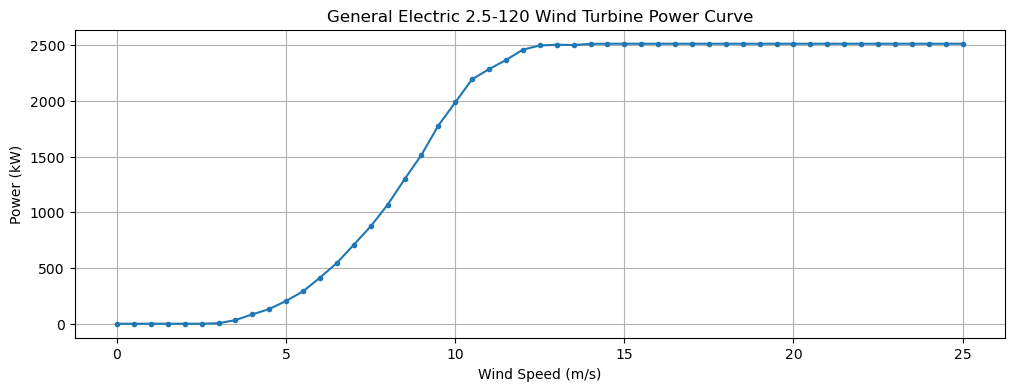

In [11]:
speed = np.arange(0,25.5,0.5)
power = np.hstack([[0,0,0,0,0,0,
                    4.5,32.3,83.9,131.6,204.6,290.7,413.1,545.1,708.4,873.5,
                    1067,1295.2,1514.2,1777.6,1985.2,2193.1,2283.7,2366.2,
                    2458.4,2496.2,2503.2,2500.1,2510.7],
                    2512*np.ones(22)])
plt.figure(figsize=(12,4))
plt.plot(speed,power,'.-'), plt.grid(True)
plt.title('General Electric 2.5-120 Wind Turbine Power Curve')
plt.xlabel('Wind Speed (m/s)'), plt.ylabel('Power (kW)')
plt.show()

Use the data to create a functon $P(U)$:

In [12]:
P = lambda x: np.interp(x,speed,power)

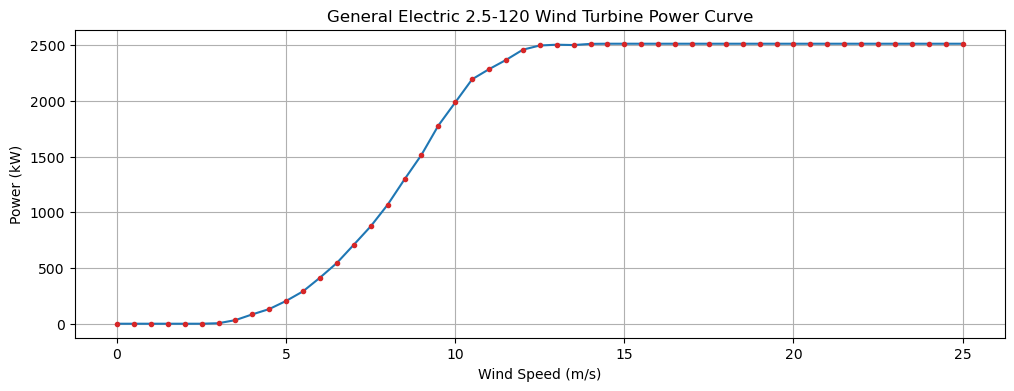

In [13]:
plt.figure(figsize=(12,4))
plt.plot(speed,P(speed),c='C0')
plt.plot(speed,power,'.',c='C3'), plt.grid(True)
plt.title('General Electric 2.5-120 Wind Turbine Power Curve')
plt.xlabel('Wind Speed (m/s)'), plt.ylabel('Power (kW)')
plt.show()

The function $P$ is defined by interpolating the data points in the power curve up to 25 m/s. Check if there are any values above the cut-out wind speed. In other words, find the maximum wind speed in the dataset.

*Compute Power*

Compute the power by applying the function $P$ to the column `wind_speed` and create a new column in the dataframe for the power.

Plot the histogram of wind power values.

*Compute Energy*

Each measurement is the average over a 10 minute period. Multiplying the power by 1/6 hours gives the energy generated in that 10 minute period in kWh. Compute the energy generated in each 10 minute interval and create a new column in the dataframe for the energy.

Plot the histogram of energy values.

**Analyze and Assess:**

The distribution of daily energy generation $E$ is a bit different from other distributions. Since the power is bounded below by 0 and above by 2.512 MW x 24 hours =  60.288 MWh and the fact that there are in fact days where the energy is equal to 0 or 60 MW the distribuution, the probability density functions $f(x)$ is non-zero only when $0 < x < 60.288$. A kernel density function with gaussian kernel does not fit well even with a small bandwidth. Use the histogram bins and values instead to construct a kernel density function and estimate the probability that the energy generated in a day in over 10MWh.